Importing the dependencies

In [ ]:
import numpy as np # for numpy array
import matplotlib.pyplot as plt # for plot and visualization
import seaborn as sns # for graphs
import cv2 # opencv library for image processing
from google.colab.patches import cv2_imshow  #for displaying the image
from PIL import Image # for image processing task
import tensorflow as tf # Deep learning library
tf.random.set_seed(3) #The purpose of setting the seed is that when we are training a neural network and feeding data into it, several values are generated randomly during the learning process. Because of this randomness, each time we train the neural network—even with the same data—the accuracy and other results may vary slightly. By setting the random seed to a specific number, we ensure that these random values are generated in the same way every time, making the results consistent across runs.
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

LOading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data ----> 60000 Images

Test Data ----> 10000 Images


Training Data ----> 28 * 28

Grayscale Image ----> 1 channel

In [ ]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


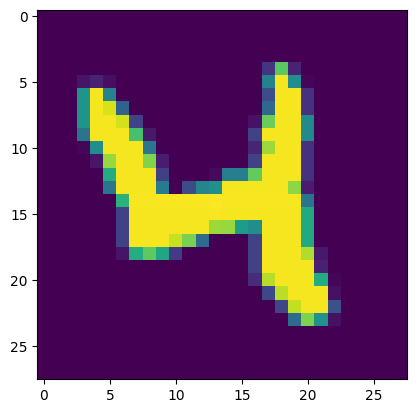

4


In [ ]:
#display the image
plt.imshow(X_train[20])
plt.show()

#printing the corresponding label
print(Y_train[20])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding

All the images have the same dimensions in this datset. If not we have to resize all the images to a common dimensions

In [ ]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

0/255 = 0

255/255 = 1

In [ ]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural networks

In [ ]:
# setting up the layer of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer 1  # instead of having rows and columns all the values will be loaded as a single line. Here (28, 28- Image dimension)
    keras.layers.Dense(50, activation='relu'), # hidden layer 1 # Dense - all the layers in this particular neural network is connected to the neurons in the previous and the next layer
    keras.layers.Dense(50, activation='relu'), # hidden layer 2
    keras.layers.Dense(10, activation='sigmoid') # output layer
])


In [ ]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #Optimizers purpose - to get the optimal parameters, loss function ('sparse_categorical_crossentropy'- when we will convert the labels into encoded labels we require this, accuracy - the no. of correct prediction divided by the total number of data points we add


In [ ]:
# training the neural network

model.fit(X_train, Y_train, epochs=10) # epoch is how many times neural network should go through the data, each time it will try to its parameter value and it will try to give its accuracy

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8520 - loss: 0.5124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9558 - loss: 0.1505
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9663 - loss: 0.1102
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0864
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0702
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9829 - loss: 0.0585
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0504
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0430
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0369
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0317


Training data accuracy is 99.01%

Accuracy on test data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1403
0.9682000279426575


Test data accuracy is 96.8%

In [ ]:
print (X_test.shape)

(10000, 28, 28)


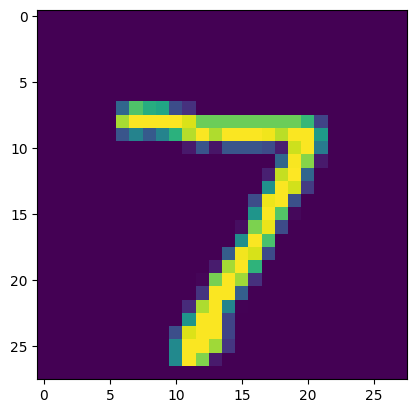

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[3.1317186e-06 2.8370257e-04 3.2642853e-01 9.6320277e-01 2.6268418e-07
 1.2398099e-03 4.8500228e-11 9.9999630e-01 1.7928195e-04 5.8211837e-02]


model.predict() gives the prediction probability of each class for the data point

In [ ]:
#converting the prediction probabilites to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilites to class label for all the test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(3), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True labels

Y_pred_labels --> Predicted labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 951    1    2    0    3    4    5    1    3   10]
 [   0 1110    5    2    0    1    4    5    7    1]
 [   3    1  990   15    3    0    4   11    5    0]
 [   0    0    2  991    0    2    2    6    3    4]
 [   0    0    1    2  955    2    4    4    1   13]
 [   1    0    0   14    1  859    3    2    4    8]
 [   4    2    1    0    5   10  931    3    2    0]
 [   1    1    5    2    2    1    1 1003    1   11]
 [   0    0    3   22    6    4    3    5  926    5]
 [   1    2    1    5   22    2    2    7    1  966]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

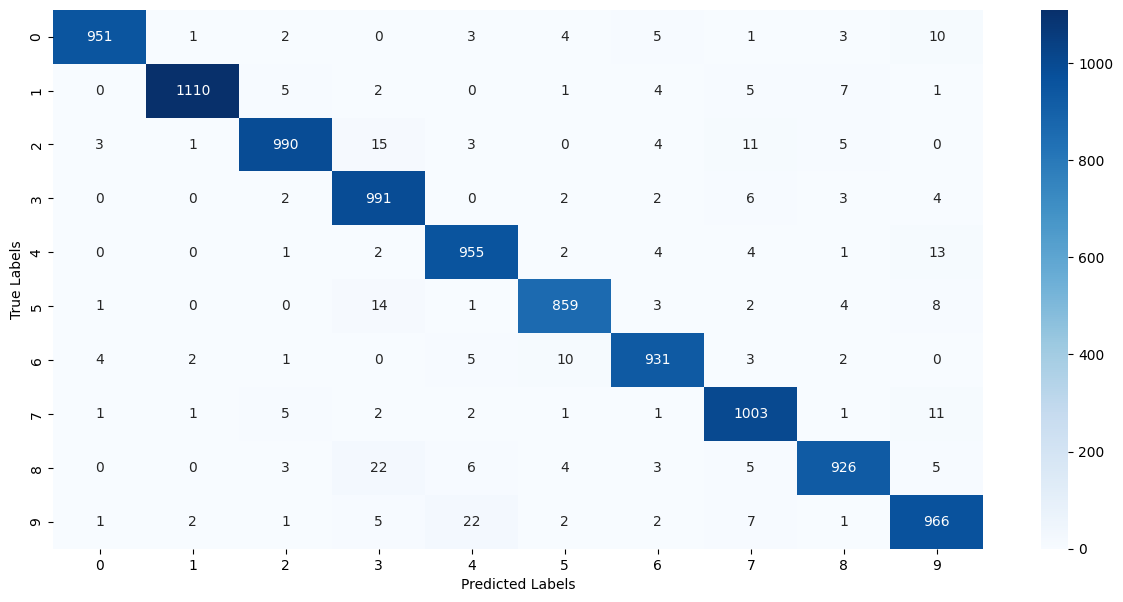

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

In [ ]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
print(input_image.shape)

(318, 318, 3)


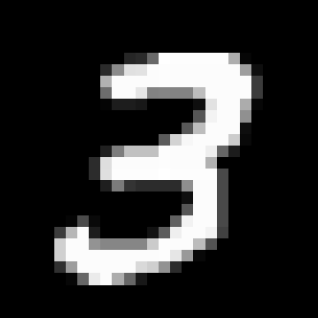

In [ ]:
cv2_imshow(input_image)

In [ ]:
# Converting the image to grayscale image
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale_image.shape

(318, 318)

In [ ]:
# Resizing the dimension of the image
input_image_resize = cv2.resize(grayscale_image, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[9.1592185e-13 4.4942503e-06 1.2502342e-02 1.0000000e+00 2.6672269e-11
  4.0223788e-02 2.8505172e-15 1.5660604e-02 6.5625896e-04 7.0684564e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


Predictive System

Enter the path of the image to be predicted: /content/MNIST_digit.png


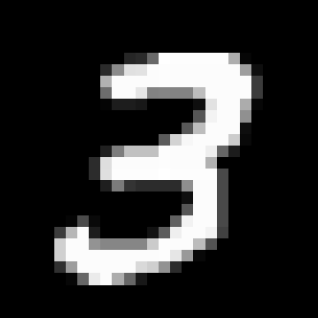

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale_image, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)